In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import mean_absolute_error
style.use('ggplot')

rawData_path = r"C:\Users\DavidSimonds\Downloads\sample_file.xlsx"
output_path = r"C:\Users\DavidSimonds\Documents\Analysis Projects\2021 Projects\Sample Yield Curve Tool"

rawData = pd.read_excel(rawData_path)

def yield_curves(xcol, ycol):
    
    """
    params:
        x_val: string of dataframe column name for the independent variable
        y_val: string of dataframe column name for dependent variable
    returns:
        yield_results: OLS regression of log(x_val) ~ y_val
        yield_visual: scatter plot of x_val, y_val with yield_curve overlayed
    """
    
    # Cleaning dataframe
    df = rawData.copy()
    
    # Dropping NaN
    df.dropna(axis = 0)
    
    # Making sure rows are > 200 input
    df = df.loc[df[xcol] > 200]
    
    # Sorting by input
    df.sort_values(xcol, ascending = True, inplace = True)
    
    # Gathering inputs
    x, y = df[xcol], df[ycol]
    df["log_x"] = np.log(x)
    
    # Constructing yield curve
    yield_results = ols("{} ~ {}".format(ycol, "log_x"), data = df).fit()
    
    # Creating a predicted column
    df["y_pred"] = yield_results.params[0] + df["log_x"]*yield_results.params[1]

    # Creating the MAE calculation
    mae = mean_absolute_error(df[ycol].to_numpy(), df["y_pred"].to_numpy())

    # Creating a string to append to output path to allow for multiple runs of the function
    identifier = str(xcol) + 'as_x' + str(ycol) + 'as_y'
    
    # Pushing yield curve results to text saved on the user specified output directory. Appending identifer
    with open(output_path + "\yield_results{}.txt".format(identifier), 'w') as f:
        f.write(yield_results.summary().as_text())
        f.write('\n')
        f.write('MAE Result: {}'.format(mae))
        f.close()
    
    # Pushing yield visual to png saved on the user specified output directory
    fig, ax = plt.subplots(figsize = (12,7))
    
    ax.scatter(
        df[xcol],
        df[ycol],
        color = '#FF6633',
        alpha = 0.7,
        s = 100,
        label = 'Observed'
    )
    
    ax.plot(
        df[xcol],
        df["y_pred"],
        color = '#1CCDF7',
        linewidth = 5,
        label = 'Predicted'
    )
    
    plt.title('{} on {}'.format(xcol, ycol), fontsize = 14, fontweight = 'bold')
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    import matplotlib.ticker as ticker
    formatter = ticker.FormatStrFormatter('$%1.2f')
    ax.xaxis.set_major_formatter(formatter)
    fig.legend()
    fig.tight_layout()
    fig.savefig(
        output_path + '\yield-visual{}.png'.format(identifier),
        format = 'png',
        dpi = 1100
    )
    plt.show()
    print(yield_results.summary())
    
    return df, yield_results.summary()

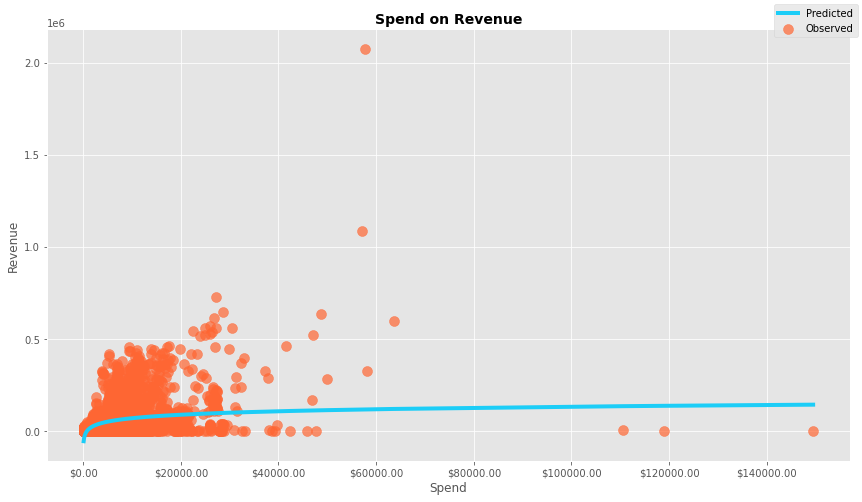

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1774.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:23:42   Log-Likelihood:                -94200.
No. Observations:                7542   AIC:                         1.884e+05
Df Residuals:                    7540   BIC:                         1.884e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.788e+05   5165.898    -34.619      0.0

In [ ]:
table, results = yield_curves("Spend", "Revenue")